In [5]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlinesData.xlsx to EastWestAirlinesData (1).xlsx


In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
#Import Dataset
airline=pd.read_excel('EastWestAirlinesData.xlsx')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:
airline2=airline.drop(['ID#'],axis=1)
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [9]:
airline2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [10]:
#Normalize heterogenous numerical data by using Standard Scaler
airline2_norm=StandardScaler().fit_transform(airline2)

In [ ]:
# within-cluster sum-of-squares criterion
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=8)
    kmeans.fit(airline2_norm)
    wcss.append(kmeans.inertia_)

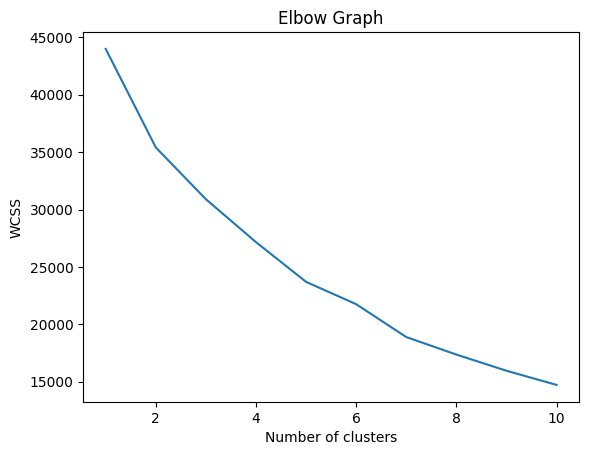

In [15]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
#Build Cluster algorithm using K=4
# Cluster algorithm using K=4
clusters4=KMeans(4,random_state=30).fit(airline2_norm)
clusters4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=30)

In [17]:
clusters4.labels_

array([0, 0, 0, ..., 3, 0, 0], dtype=int32)

In [18]:
# Assign clusters to the data set
airline4=airline2.copy()
airline4['clusters4id']=clusters4.labels_
airline4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters4id
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [19]:
# Compute the centroids for K=4 clusters with 11 variables
clusters4.cluster_centers_

array([[-0.29584258, -0.0603903 , -0.60911906,  0.03222463, -0.06075301,
        -0.51562007, -0.48778976, -0.18468409, -0.19727389, -0.2065444 ,
        -0.34933297],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [ 1.19916278,  0.8413837 ,  0.07934291,  0.15576844, -0.06276658,
         0.61091878,  1.63802866,  3.57547132,  3.86140846,  0.28565421,
         0.91563614],
       [ 0.43059508,  0.0158422 ,  1.18872871, -0.08236624, -0.05476264,
         0.91116803,  0.74463543, -0.08026444, -0.09129375,  0.37198921,
         0.57588937]])

In [20]:
# Group data by Clusters (K=4)
airline4.groupby('clusters4id').agg(['mean']).reset_index()

,clusters4id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,43828.396152,97.283863,1.223007,1.019238,1.000393,4707.805654,6.926973,201.254417,0.624656,3693.855124,0.201413
1,1,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
2,2,194432.643750,794.981250,2.168750,1.037500,1.000000,31897.281250,27.331250,5465.837500,16.018750,4708.400000,0.812500
3,3,117087.423649,156.736883,3.697729,1.002349,1.001566,39200.451057,18.761942,348.499608,1.029757,4885.918559,0.649961


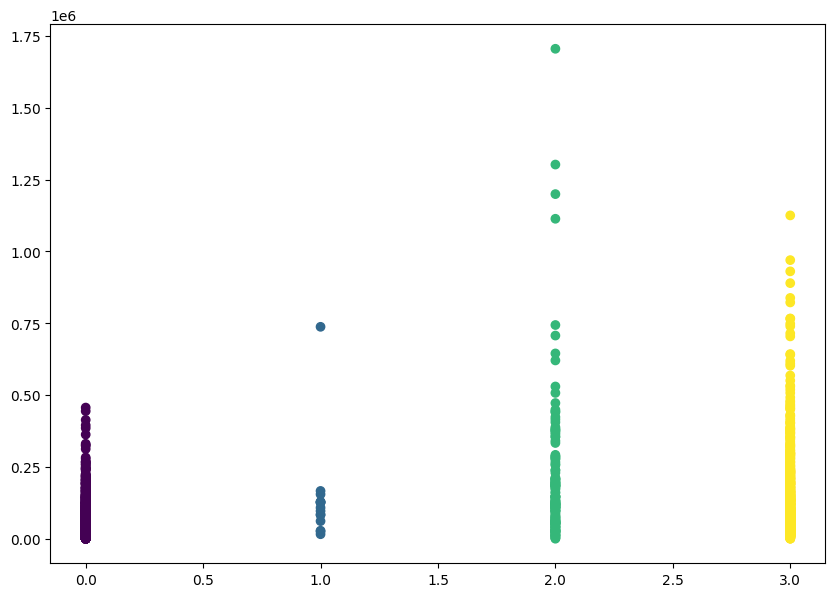

In [21]:
# Plot Clusters
plt.figure(figsize=(10, 7))
plt.scatter(airline4['clusters4id'],airline4['Balance'], c=clusters4.labels_)

In [22]:
#Build Cluster algorithm using K=5
# Cluster algorithm using K=5
clusters5=KMeans(5,random_state=30).fit(airline2_norm)
clusters5

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=30)

In [23]:
clusters5.labels_

array([0, 0, 0, ..., 3, 0, 0], dtype=int32)

In [24]:
#Assign clusters to the data set
airline5=airline2.copy()
airline5['clusters5id']=clusters5.labels_
airline5

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters5id
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [25]:
#Compute the centroids for K=5 clusters with 11 variables
clusters5.cluster_centers_

array([[-2.97441370e-01, -6.26013958e-02, -6.09944285e-01,
        -9.82418871e-02, -6.07159307e-02, -5.21330789e-01,
        -5.01454441e-01, -1.87180704e-01, -1.99831577e-01,
        -2.10475283e-01, -3.52420208e-01],
       [ 1.14970340e+00,  1.06407580e+00,  1.02900923e-01,
        -9.82418871e-02, -6.27665798e-02,  5.78252911e-01,
         1.52034538e+00,  3.44900129e+00,  3.66768718e+00,
         2.64756357e-01,  8.99553448e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01],
       [ 4.24748143e-01, -1.21396375e-02,  1.19282031e+00,
        -9.82418871e-02, -5.47249449e-02,  9.11488076e-01,
         7.40508649e-01, -9.38523027e-02, -1.02849450e-01,
         3.77190968e-01,  5.65958814e-01],
       [-4.68896637e-02, -1.56235600e-01, -6.68227273e-01,
         9.03825361e+00, -6.27665798e-02, -1.01665326e-01,
  

In [26]:
#Group data by Clusters (K=5)
airline5.groupby('clusters5id').agg(['mean']).reset_index()

,clusters5id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,43669.876000,95.611600,1.221200,1.000000,1.000400,4568.151200,6.791600,197.838000,0.615200,3684.750400,0.200000
1,1,189448.964497,967.248521,2.201183,1.000000,1.000000,31108.467456,26.201183,5288.775148,15.284024,4665.248521,0.804734
2,2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,3,116436.737421,134.935535,3.702830,1.000000,1.001572,39185.495283,18.721698,329.176101,0.985063,4897.754717,0.644654
4,4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


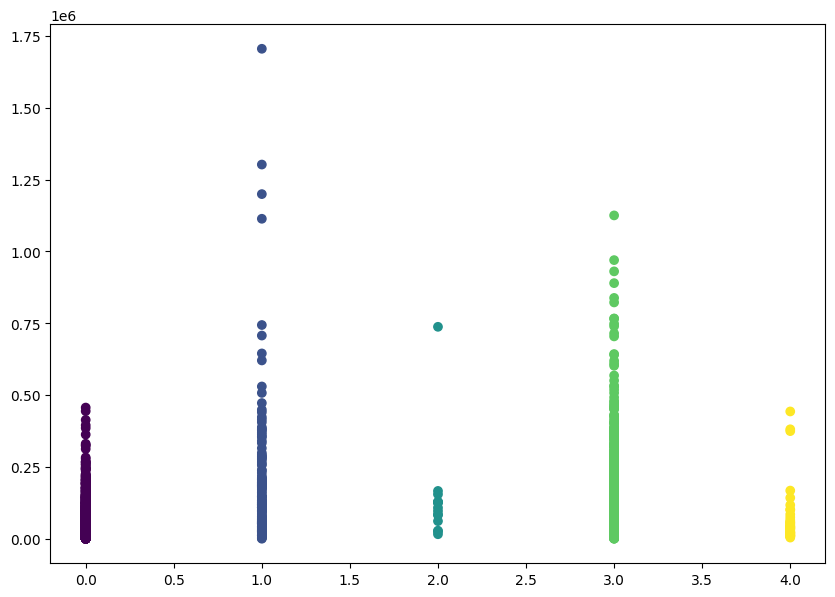

In [27]:
#Plot Clusters
plt.figure(figsize=(10, 7))
plt.scatter(airline5['clusters5id'],airline5['Balance'], c=clusters5.labels_)